# Nation Level
# The target is the relation between price and macro

In [1]:
import numpy as np
import pandas as pd

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import xgboost
from sklearn.grid_search import GridSearchCV
from collections import OrderedDict

from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

from sklearn.metrics import mean_squared_error

/Users/Bixing/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Bixing/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
df_nation_1_raw=pd.read_excel('./data_national/Fig3-1.xls',skiprows=6)
df_nation_1_raw.columns=['Date','Real Home Price Index','Date_1', 'Real Building Cost Index', 'US Population Millions', 'Long Rate','Long Rate Source', 'Date_2','Nominal Home Price Index','HPI Source','Date_3', 'Nominal Building Cost Index', 'Build Cost Source','Date_4','Consumer Price Index','CPI Annual&Quarterly','Empty','Date_5','CPI Annual']

df_nation_2_raw=pd.read_excel('./data_national/ie_data.xls',skiprows=7).drop(['Unnamed: 11','Unnamed: 12'],axis=1)
df_nation_2_raw.columns=['Date','S&P Comp. P','Dividend D', 'Earning E', 'Consumer Price Index CPI', 'Date Fraction','Long Interest Rate GS10', 'Real Price','Real Dividend','Real Earnings','CAPE']

df_nation_3_raw=pd.read_excel('./data_national/chapt26.xlsx',skiprows=7)#.drop(['Unnamed: 11','Unnamed: 12'],axis=1)
df_nation_3_raw.columns=['Date','S&P Composite Stock Price Index P','Dividends Accruing to Index D', 'Earning Accuring to Index E','One-year Interest Rate R', 'Long Government Bond Yield RLong', 'Consumer Price Index CPI','RealR', 'Real Per Capita Consumption','Date_1','RealP','P*', 'P*r', 'P*C','RealD','Return','ln(1+ret)','RealE','P/E','E10','P/E10']
df_nation_3_raw['Real Per Capita Consumption'][0:3]=[np.nan]*3


/Users/Bixing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [3]:
df_nation_1_raw

,Date,Real Home Price Index,Date_1,Real Building Cost Index,US Population Millions,Long Rate,Long Rate Source,Date_2,Nominal Home Price Index,HPI Source,Date_3,Nominal Building Cost Index,Build Cost Source,Date_4,Consumer Price Index,CPI Annual&Quarterly,Empty,Date_5,CPI Annual
0,1890.000000,100.000000,1890.0,51.362340,63.056,3.42,Homer,1890.000000,3.557296,Grebler,1890.0,NaN,Grebler,1890.000000,7.611652,Warren&Pearson,NaN,1890.0,7.611652
1,1891.000000,88.011791,1891.0,47.266163,64.361,3.62,Homer,1891.000000,3.209111,Grebler,1891.0,NaN,Grebler,1891.000000,7.801942,Warren&Pearson,NaN,1891.0,7.801942
2,1892.000000,95.421736,1892.0,52.048155,65.666,3.6,Homer,1892.000000,3.267142,Grebler,1892.0,NaN,Grebler,1892.000000,7.326213,Warren&Pearson,NaN,1892.0,7.326213
3,1893.000000,92.297385,1893.0,44.673332,66.970,3.75,Homer,1893.000000,3.406416,Grebler,1893.0,NaN,Grebler,1893.000000,7.897091,Warren&Pearson,NaN,1893.0,7.897091
4,1894.000000,123.980483,1894.0,57.263434,68.275,3.7,Homer,1894.000000,3.969316,Grebler,1894.0,NaN,Grebler,1894.000000,6.850483,Warren&Pearson,NaN,1894.0,6.850483
5,1895.000000,117.455092,1895.0,61.470338,69.580,3.46,Homer,1895.000000,3.603721,Grebler,1895.0,NaN,Grebler,1895.000000,6.565052,Warren&Pearson,NaN,1895.0,6.565052
6,1896.000000,100.302990,1896.0,60.068945,70.885,3.6,Homer,1896.000000,3.122064,Grebler,1896.0,NaN,Grebler,1896.000000,6.660193,Warren&Pearson,NaN,1896.0,6.660193
7,1897.000000,106.515703,1897.0,62.384893,72.189,3.4,Homer,1897.000000,3.220717,Grebler,1897.0,NaN,Grebler,1897.000000,6.469903,Warren&Pearson,NaN,1897.0,6.469903
8,1898.000000,110.184140,1898.0,61.438038,73.494,3.35,Homer,1898.000000,3.429628,Grebler,1898.0,NaN,Grebler,1898.000000,6.660193,Warren&Pearson,NaN,1898.0,6.660193
9,1899.000000,103.853113,1899.0,64.044606,74.799,3.1,Homer,1899.000000,3.278748,Grebler,1899.0,NaN,Grebler,1899.000000,6.755342,Warren&Pearson,NaN,1899.0,6.755342


In [4]:
#create a new df and process df1
df_nation=df_nation_1_raw[['Date','Real Home Price Index','Nominal Home Price Index','Consumer Price Index']].copy()
col_names_1=['Real Building Cost Index','US Population Millions','Long Rate','CPI Annual']
for col_name in col_names_1:
    df_nation[col_name]=df_nation['Date'].apply(lambda date:df_nation_1_raw[ df_nation_1_raw['Date_1']==int(date) ][col_name].values[0])
df_nation=df_nation.iloc[0:851]
#process df2
col_names_2=['S&P Comp. P','Dividend D', 'Earning E','Long Interest Rate GS10', 'Real Price','Real Dividend','Real Earnings','CAPE']
for col_name in col_names_2:
    df_nation[col_name]=df_nation['Date'].apply(lambda date:df_nation_2_raw[ df_nation_2_raw['Date']==(int(date)+int(( date-int(date) )*12+1)*0.01) ][col_name].values[0])
#process df3
col_names_3=['One-year Interest Rate R','RealR', 'Real Per Capita Consumption','P*', 'P*r', 'P*C','Return','ln(1+ret)','P/E']
for col_name in col_names_3:
    df_nation[col_name]=df_nation['Date'].apply(lambda date:df_nation_3_raw[ df_nation_3_raw['Date']==int(date) ][col_name].values[0] if int(date) in df_nation_3_raw['Date'].values else np.nan)

In [5]:
# the time interval is different, split the data and fillna.
df_nation=df_nation.round(3)

df_nation_1890_1952=df_nation[(df_nation['Date']>=1889.99)&(df_nation['Date']<=1952.01)].copy()
df_nation_af1952=df_nation[df_nation['Date']>=1952.01].copy()

In [6]:
for col_name in df_nation.columns:
    print(col_name,'%.2f%%'%(100*df_nation[col_name].isnull().sum()/len(df_nation)) )#, '\nHave NaN?', df_nation[col_name].isnull().sum()>=1)

Date 0.00%
Real Home Price Index 0.00%
Nominal Home Price Index 0.00%
Consumer Price Index 0.00%
Real Building Cost Index 3.76%
US Population Millions 2.35%
Long Rate 0.00%
CPI Annual 6.58%
S&P Comp. P 0.00%
Dividend D 0.00%
Earning E 0.24%
Long Interest Rate GS10 0.00%
Real Price 0.00%
Real Dividend 0.00%
Real Earnings 0.24%
CAPE 0.00%
One-year Interest Rate R 9.40%
RealR 7.99%
Real Per Capita Consumption 12.22%
P* 12.22%
P*r 12.22%
P*C 12.22%
Return 7.99%
ln(1+ret) 7.99%
P/E 7.99%


In [7]:
df_nation_1890_1952.set_index('Date',inplace=True)
df_nation_af1952.set_index('Date',inplace=True)

In [8]:
#fill na
for col_name in df_nation_1890_1952.columns:
    if df_nation_1890_1952[col_name].isnull().sum()>=1:
        df_nation_1890_1952[col_name]=df_nation_1890_1952[col_name].interpolate(method='index')#, order=5)

for col_name in df_nation_af1952.columns:
    if df_nation_af1952[col_name].isnull().sum()>=1:
        df_nation_af1952[col_name]=df_nation_af1952[col_name].interpolate(method='index')#, order=5)

In [9]:
df_nation=pd.concat([df_nation_1890_1952, df_nation_af1952], axis=0)#,ignore_index=True)

# After the database is set, our question is how which value to predict.
# In a time series problem, the quantitiy we predict is return
# But in a data science problem, the quantity we predict is usully price.

# Here, we will determine our target

In [10]:
df_nation.reset_index(inplace=True)

In [11]:
real_price_return=[]
nominal_price_return=[]

for i in range(len(df_nation)-1):
    real_price_return.append( (df_nation['Real Home Price Index'][i+1]-df_nation['Real Home Price Index'][i])/df_nation['Real Home Price Index'][i]/(df_nation['Date'][i+1]-df_nation['Date'][i]) )
    nominal_price_return.append( (df_nation['Nominal Home Price Index'][i+1]-df_nation['Nominal Home Price Index'][i])/df_nation['Nominal Home Price Index'][i]/(df_nation['Date'][i+1]-df_nation['Date'][i]))
real_price_return.append(real_price_return[-1])
nominal_price_return.append(nominal_price_return[-1])

df_nation['real_price_return']=real_price_return
df_nation['nominal_price_return']=nominal_price_return

In [12]:
df_nation.set_index('Date',inplace=True)

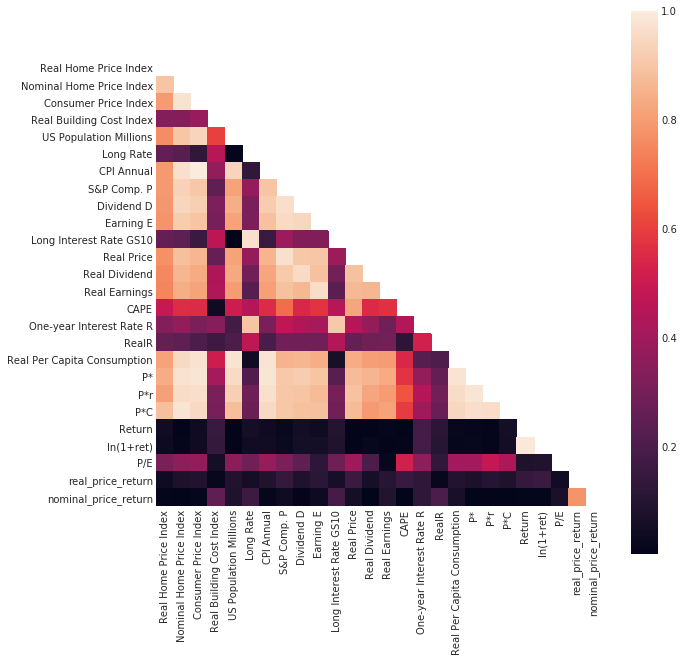

In [13]:
plt.figure(figsize=(10, 10))

corr = abs( df_nation.corr() )
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True)

#corrmat = abs( df_nation.corr() )
#sns.heatmap(corrmat, vmax=1., square=True)
#plt.title("Important variables correlation map", fontsize=15)

## Thus, with current data, the price is a better quantitiy to predict.

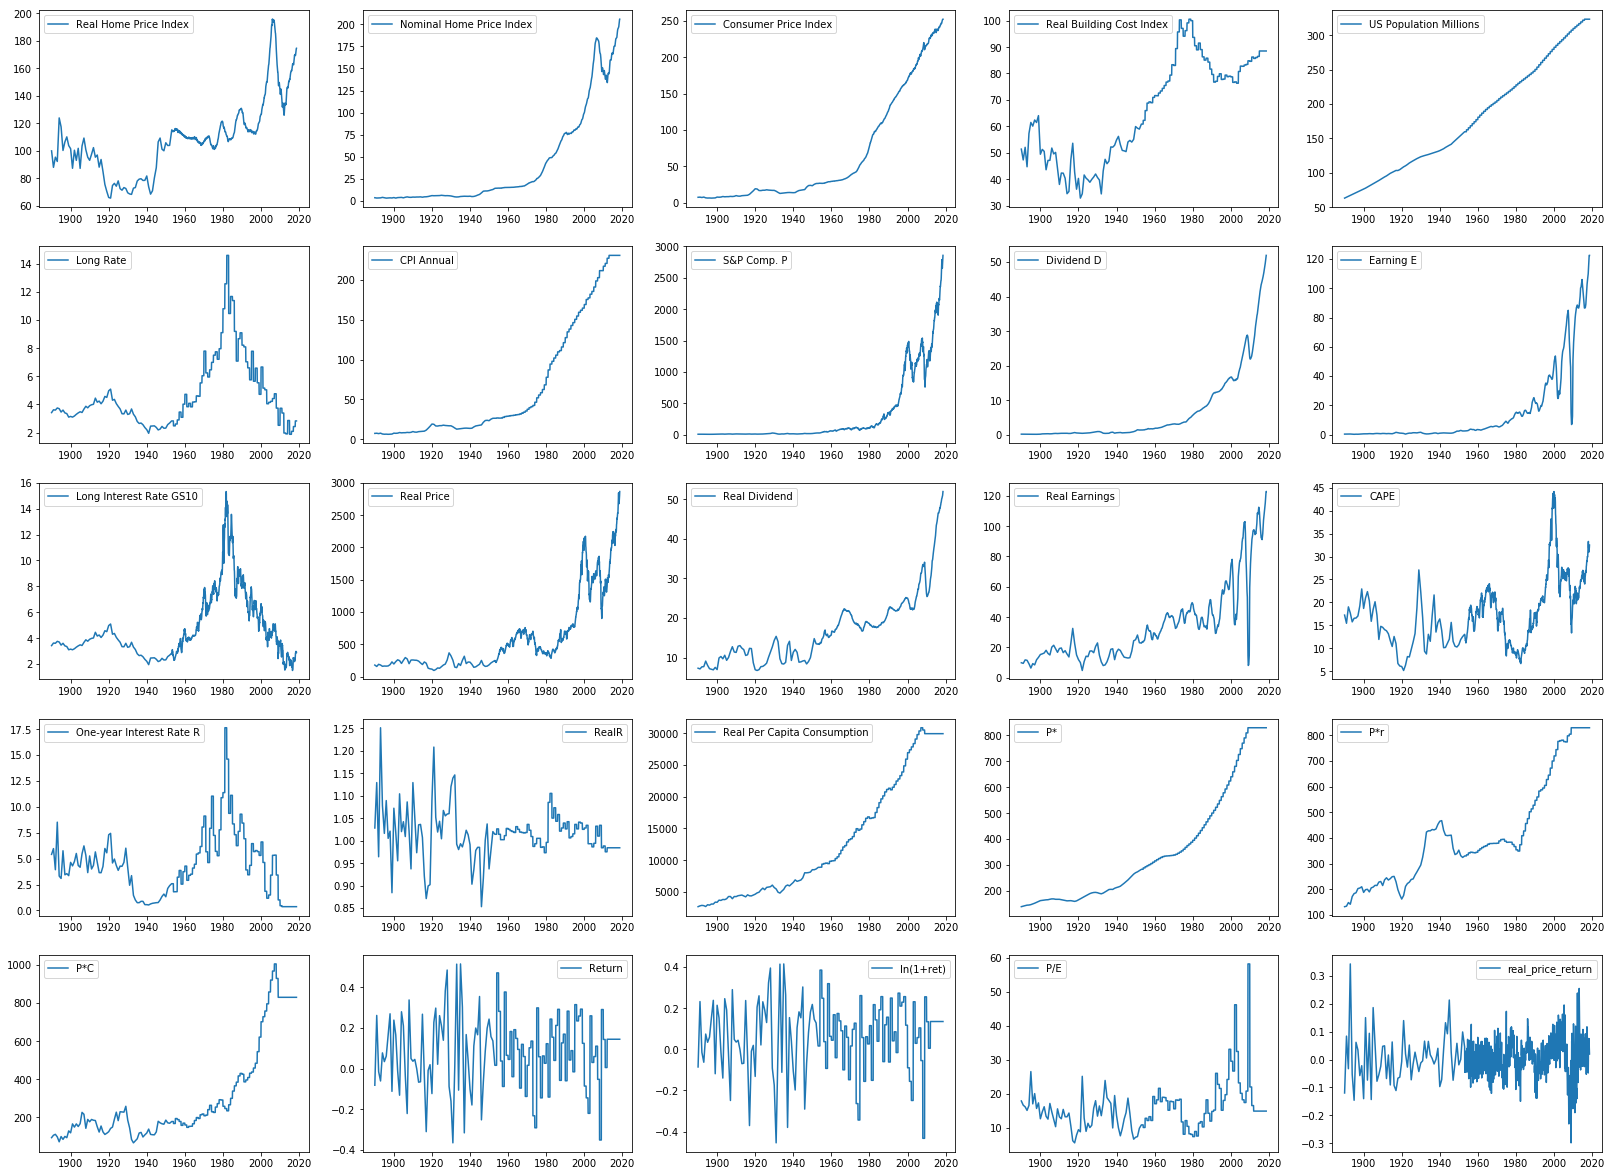

In [14]:
counter=0
plt.figure(figsize=(28,21 ))
for colname in df_nation.columns[:-1]:
    counter+=1
    plt.subplot(5,5,counter)
    plt.plot(df_nation.index,df_nation[colname],label=colname)
    plt.legend()
plt.show()

## From this figure, we can see that the real home index reflect more charateristic of change in other parameters. Thus, we decide to use real home index as target.

In [15]:
df_nation_corr=df_nation.corr()
drop_lst=[]
for col in df_nation_corr.columns:
    if abs(df_nation_corr[col][0])<0.2: drop_lst.append(col)
df_nation.drop(drop_lst,axis=1,inplace=True)

In [16]:
df_nation.drop(['Nominal Home Price Index'],axis=1,inplace=True)

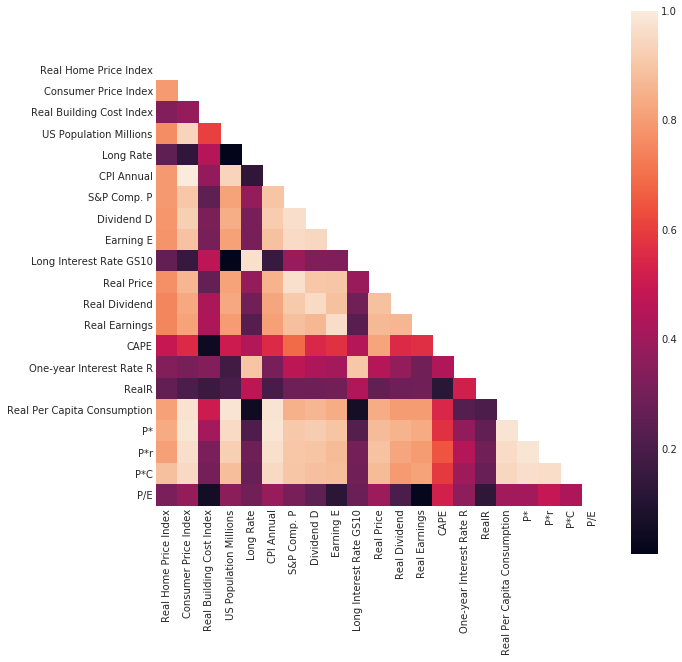

In [17]:
plt.figure(figsize=(10, 10))

corr = abs( df_nation.corr() )
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True)

In [18]:
#def fill_df(date,df_source,date_col,val_col):
#    return df_source[ df_source[date_col]==date ][val_col].values[0]
#test, no problem
#df_nation_1_raw[ df_nation_1_raw['Date_1']==int(1956.32) ]['Real Building Cost Index'].values[0]
#df_nation_1_raw[ df_nation_1_raw['Date_1']==int(1956.99) ]['Real Building Cost Index'].values[0]

In [19]:
#date=2007
#int(date)+int(( date-int(date) )*12+1)*0.01

#date=2007.4
#date=int(date)+int(( date-int(date) )*12+1)*0.01
#df_nation_2_raw[df_nation_2_raw['Date']==date ]

In [20]:
df_nation.head(5)

,Real Home Price Index,Consumer Price Index,Real Building Cost Index,US Population Millions,Long Rate,CPI Annual,S&P Comp. P,Dividend D,Earning E,Long Interest Rate GS10,...,Real Dividend,Real Earnings,CAPE,One-year Interest Rate R,RealR,Real Per Capita Consumption,P*,P*r,P*C,P/E
Date,,,,,,,,,,,,,,,,,,,,,
1890.0,100.000,7.612,51.362,63.056,3.42,7.612,5.38,0.220,0.299,3.42,...,7.303,9.932,17.220,5.41,1.028,2674.740,138.588,131.990,93.378,17.933
1891.0,88.012,7.802,47.266,64.361,3.62,7.802,4.84,0.220,0.294,3.62,...,7.124,9.527,15.429,5.97,1.129,2802.827,140.722,133.839,106.098,16.690
1892.0,95.422,7.326,52.048,65.666,3.60,7.326,5.51,0.222,0.342,3.60,...,7.646,11.812,19.016,3.93,0.964,2877.010,142.545,148.070,110.869,16.206
1893.0,92.297,7.897,44.673,66.970,3.75,7.897,5.61,0.241,0.361,3.75,...,7.704,11.543,17.657,8.52,1.251,2834.846,144.399,141.390,97.513,15.162
1894.0,123.980,6.850,57.263,68.275,3.70,6.850,4.32,0.247,0.252,3.70,...,9.099,9.283,15.740,3.32,1.078,2698.708,144.877,171.430,71.684,16.615


In [21]:
len(df_nation.columns)

21

In [22]:
#sc=MinMaxScaler()
#df_nation['Real Home Price Index'].values
#test=sc.fit_transform(df_nation['Real Home Price Index'].values.reshape(-1,1))
#sc.inverse_transform(test)
#test.reshape(-1)


In [23]:
df_nation_scaled=df_nation.copy()

In [24]:
sc_dict={}

In [25]:
for colname in df_nation.columns:
    sc=MinMaxScaler()
    df_nation_scaled[colname]=sc.fit_transform(df_nation[colname].values.reshape(-1,1)).reshape(-1)
    sc_dict[colname]=sc    

In [26]:
train_prop=0.85
X_train=df_nation_scaled.iloc[0:int(len(df_nation_scaled)*train_prop)-1]
y_train=df_nation_scaled.iloc[1:int(len(df_nation_scaled)*train_prop)]['Real Home Price Index']
X_test=df_nation_scaled.iloc[int(len(df_nation_scaled)*train_prop)-1:-1]
y_test=df_nation_scaled.iloc[int(len(df_nation_scaled)*train_prop):]['Real Home Price Index']

In [27]:
#identify the rough range of parameters

'''
#identify the rough range of parameters
parameters_for_testing = {
    'colsample_bytree':[0.4,0.6,0.8,1],
    'gamma':[0,0.03,0.1,0.3],
    'min_child_weight':[1,5,10],
    'learning_rate':[0.1,0.07,0.05],
    'max_depth':[1,3,5,10],
    'n_estimators':[1000,10000],
    'reg_alpha':[1e-5, 1e-2,  0.75],
    'reg_lambda':[1e-5, 1e-2, 0.45],
    'subsample':[0.6,0.95]  
}

                    
xgb_model = xgboost.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='neg_mean_squared_error')
gsearch1.fit(X_train,y_train)
print (gsearch1.grid_scores_)
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)
'''

"\n#identify the rough range of parameters\nparameters_for_testing = {\n    'colsample_bytree':[0.4,0.6,0.8,1],\n    'gamma':[0,0.03,0.1,0.3],\n    'min_child_weight':[1,5,10],\n    'learning_rate':[0.1,0.07,0.05],\n    'max_depth':[1,3,5,10],\n    'n_estimators':[1000,10000],\n    'reg_alpha':[1e-5, 1e-2,  0.75],\n    'reg_lambda':[1e-5, 1e-2, 0.45],\n    'subsample':[0.6,0.95]  \n}\n\n                    \nxgb_model = xgboost.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,\n     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)\n\ngsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='neg_mean_squared_error')\ngsearch1.fit(X_train,y_train)\nprint (gsearch1.grid_scores_)\nprint('best params')\nprint (gsearch1.best_params_)\nprint('best score')\nprint (gsearch1.best_score_)\n"

In [28]:
best_params={'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 10000, 'reg_alpha': 1e-05, 'reg_lambda': 0.01, 'subsample': 0.95}

In [29]:
best_xgb_model = xgboost.XGBRegressor(colsample_bytree=1,
                 gamma=0,                 
                 learning_rate=0.1,
                 max_depth=3,
                 min_child_weight=1,
                 n_estimators=10000,                                                                    
                 reg_alpha=1e-05,
                 reg_lambda=0.01,
                 subsample=0.95,
                 seed=1992)
best_xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=10000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=1e-05, reg_lambda=0.01, scale_pos_weight=1, seed=1992,
       silent=True, subsample=0.95)

In [30]:
y_pred=best_xgb_model.predict(X_test)
y_train_pred=best_xgb_model.predict(X_train)

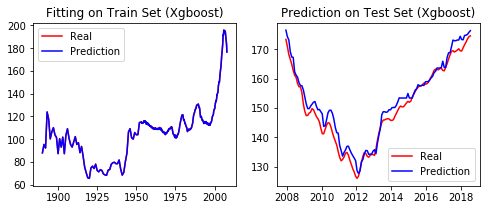

In [72]:
fig=plt.figure(figsize=(8,3))


plt.subplot(1,2,1)
plt.plot(X_train.index.values,sc_dict['Real Home Price Index'].inverse_transform(y_train.values.reshape(-1,1)).reshape(-1),color='red',label='Real')
plt.plot(X_train.index.values,sc_dict['Real Home Price Index'].inverse_transform(y_train_pred.reshape(-1,1)).reshape(-1),color='blue',label='Prediction')
plt.title('Fitting on Train Set (Xgboost)')
plt.legend()
plt.subplot(1,2,2)
plt.plot(X_test.index.values,sc_dict['Real Home Price Index'].inverse_transform(y_test.values.reshape(-1,1)).reshape(-1),color='red',label='Real')
plt.plot(X_test.index.values,sc_dict['Real Home Price Index'].inverse_transform(y_pred.reshape(-1,1)).reshape(-1),color='blue',label='Prediction')
plt.title('Prediction on Test Set (Xgboost)')
plt.xlabel
plt.legend()

plt.show()

In [32]:
np.sqrt(mean_squared_error(sc_dict['Real Home Price Index'].inverse_transform(y_test.values.reshape(-1,1)).reshape(-1),sc_dict['Real Home Price Index'].inverse_transform(y_pred.reshape(-1,1)).reshape(-1)))

2.863182357484974

In [80]:
F_i=pd.DataFrame(list(OrderedDict(sorted(best_xgb_model.get_booster().get_fscore().items(), key=lambda t: t[1], reverse=True)).items())[1:])
F_i.columns=['Feature','f score']
F_i

,Feature,f score
0,Long Interest Rate GS10,443
1,S&P Comp. P,348
2,CAPE,344
3,Consumer Price Index,321
4,Real Dividend,311
5,Real Price,309
6,Real Earnings,308
7,Earning E,242
8,Real Building Cost Index,156
9,RealR,145


In [83]:
F_i['Feature']=['Long Rate GS10','S&P Comp. P','CAPE','CPI','Real D', 'Real P','Real E','E','Real Building Cost','Real R','D','R','Long Rate','P/E','P*C','P*r','Population','P*','Real PCC']

In [86]:

F_i_2=F_i.set_index('Feature').transpose()
F_i_2

Feature,Long Rate GS10,S&P Comp. P,CAPE,CPI,Real D,Real P,Real E,E,Real Building Cost,Real R,D,R,Long Rate,P/E,P*C,P*r,Population,P*,Real PCC
f score,443,348,344,321,311,309,308,242,156,145,126,94,84,78,72,58,52,20,13


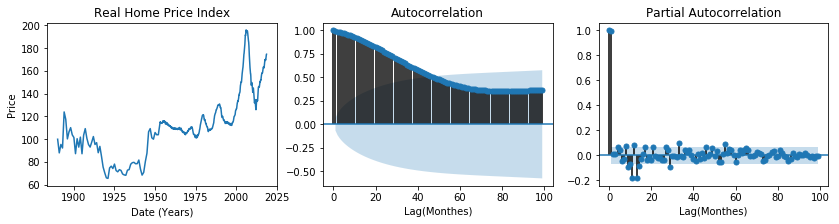

In [87]:


fig=plt.figure(figsize=(14,3))

ax1=plt.subplot(1,3,1)
ax1.plot(df_nation['Real Home Price Index'])
plt.xlabel('Date (Years)')
plt.ylabel('Price')
plt.title('Real Home Price Index')

ax3 = fig.add_subplot(1,3,2)
plot_acf(df_nation['Real Home Price Index'].loc[63:].values,lags=np.arange(0,100),ax=ax3)
plt.xlabel('Lag(Monthes)')

ax4 = fig.add_subplot(1,3,3)
plot_pacf(df_nation['Real Home Price Index'].loc[63:].values,lags=np.arange(0,100),ax=ax4)
plt.xlabel('Lag(Monthes)')
plt.show()


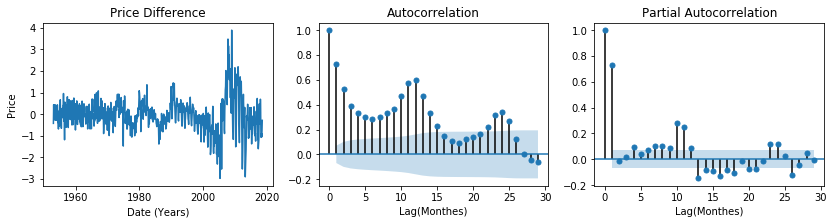

In [35]:
difference=df_nation['Real Home Price Index'].iloc[63:-1].values-df_nation['Real Home Price Index'].iloc[64:].values

fig=plt.figure(figsize=(14,3))

ax1=plt.subplot(1,3,1)
ax1.plot(df_nation.iloc[63:-1].index.values,difference)
ax1.set_title('Price Difference')
ax1.set_xlabel('Date (Years)')
ax1.set_ylabel('Price')


ax3 = fig.add_subplot(1,3,2)
plot_acf(difference,lags=np.arange(0,30),ax=ax3)
ax3.set_xlabel('Lag(Monthes)')


ax4 = fig.add_subplot(1,3,3)
plot_pacf(difference,lags=np.arange(0,30),ax=ax4)
ax4.set_xlabel('Lag(Monthes)')
plt.show()

In [36]:
'''
AIC_matrix=np.full([30,30],np.inf)
BIC_matrix=np.full([30,30],np.inf)
HQIC_matrix=np.full([30,30],np.inf)

for i in [0,1,10,12,14,20,30]:
    for j in [0,1,2,3,4,5,8,10,14]:
        try:
            model_ariam = ARIMA(df_nation['Real Home Price Index'].loc[63:].values, order=(i,1,j))
            model_ariam_fit = model_ariam.fit(disp=0)
            AIC_matrix[i][j]=model_ariam_fit.aic
            BIC_matrix[i][j]=model_ariam_fit.bic
            HQIC_matrix[i][j]=model_ariam_fit.hqic
            print(i,j,'finished')
        except:pass
        
aic_min_idx=np.unravel_index(AIC_matrix.argmin(), AIC_matrix.shape)
bic_min_idx=np.unravel_index(BIC_matrix.argmin(), BIC_matrix.shape)
hqic_min_idx=np.unravel_index(HQIC_matrix.argmin(), HQIC_matrix.shape)


'''

"\nAIC_matrix=np.full([30,30],np.inf)\nBIC_matrix=np.full([30,30],np.inf)\nHQIC_matrix=np.full([30,30],np.inf)\n\nfor i in [0,1,10,12,14,20,30]:\n    for j in [0,1,2,3,4,5,8,10,14]:\n        try:\n            model_ariam = ARIMA(df_nation['Real Home Price Index'].loc[63:].values, order=(i,1,j))\n            model_ariam_fit = model_ariam.fit(disp=0)\n            AIC_matrix[i][j]=model_ariam_fit.aic\n            BIC_matrix[i][j]=model_ariam_fit.bic\n            HQIC_matrix[i][j]=model_ariam_fit.hqic\n            print(i,j,'finished')\n        except:pass\n        \naic_min_idx=np.unravel_index(AIC_matrix.argmin(), AIC_matrix.shape)\nbic_min_idx=np.unravel_index(BIC_matrix.argmin(), BIC_matrix.shape)\nhqic_min_idx=np.unravel_index(HQIC_matrix.argmin(), HQIC_matrix.shape)\n\n\n"

In [37]:
#aic_min_idx#(12,2)
#bic_min_idx#(12,2)
#hqic_min_idx#(12,2)

In [44]:
bic_min_idx=(12,2)

In [39]:
arima_model = ARIMA(df_nation['Real Home Price Index'].iloc[63:].values, order=(bic_min_idx[0],1,bic_min_idx[1]))
arima_fit = arima_model.fit(disp=0)

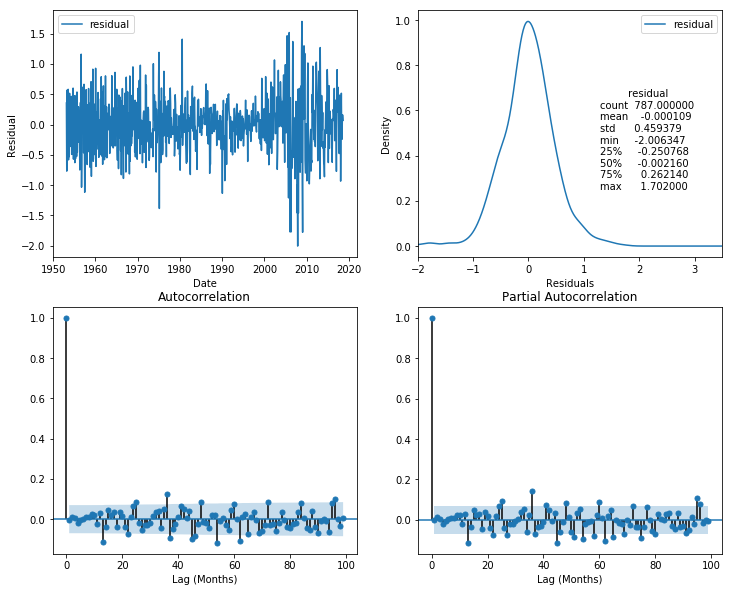

In [53]:
fig=plt.figure(figsize=(12,10))

ax1 = fig.add_subplot(2,2,1)
residuals =  pd.DataFrame(arima_fit.resid).rename(columns={0:'residual'})
residuals['Date']=df_nation.iloc[64:].index.values
residuals.set_index('Date',inplace=True)
residuals.plot(ax=ax1)
ax1.set_ylabel('Residual')

s=residuals.describe().rename(columns={0:'residual'}).to_string()

ax2=fig.add_subplot(2,2,2)
residuals.plot(kind='kde',ax=ax2)
ax2.set_xlim([-2,3.5])
ax2.text(1.3,0.25,s)
ax2.set_xlabel('Residuals')

ax3=fig.add_subplot(2,2,3)
plot_acf(residuals.values,lags=np.arange(0,100),ax=ax3)
ax3.set_xlabel('Lag (Months)')

ax4=fig.add_subplot(2,2,4)
plot_pacf(residuals.values,lags=np.arange(0,100),ax=ax4)
ax4.set_xlabel('Lag (Months)')
plt.show()

In [45]:
# code from
# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
X = df_nation['Real Home Price Index'].values[63:]
size = -128
train, test = X[:size], X[size:]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(bic_min_idx[0],1,bic_min_idx[1]))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    if (t!=0)&(t%10==0):
        print('%d/%d prediction are finished'%(t,len(test)))
#print('predicted=%f, expected=%f' % (yhat, obs))

10/128 prediction are finished
20/128 prediction are finished
30/128 prediction are finished
40/128 prediction are finished
50/128 prediction are finished
60/128 prediction are finished
70/128 prediction are finished
80/128 prediction are finished
90/128 prediction are finished
100/128 prediction are finished
110/128 prediction are finished
120/128 prediction are finished


In [46]:
error = np.sqrt(mean_squared_error(test, predictions))
print('Test Standard Deviation: %.3f' % error)

Test Standard Deviation: 0.658


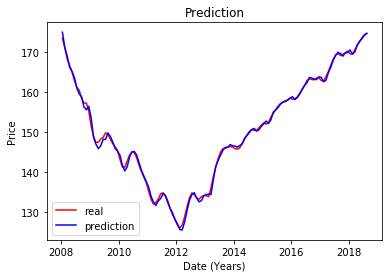

In [47]:
plt.plot(df_nation.index.values[-128:],test,color='red',label='real')
plt.plot(df_nation.index.values[-128:],predictions, color='blue',label='prediction')
plt.title('Prediction')
plt.ylabel('Price')
plt.xlabel('Date (Years)')
#plt.text(60,2200,'Test Standard Deviation: %.3f' % error)
plt.legend()
plt.show()

In [48]:
#https://www.kaggle.com/c/rossmann-store-sales/discussion/17014
# Xgboost only can handle seasonlity when the features is properly engineered. You need to clearly define month season.
# Trees definitely shouldn't have a problem dealing with seasonality when given the appropriate features (separated month, dow, doy… etc). They will simply split on the seasonal variable.



In [59]:
df_t1=pd.DataFrame([('SP500_Volume', 2732),
 ('SP500_Open', 1803),
 ('SP500_Low', 1052),
 ('SP500_Close', 975),
 ('SP500_High', 932),
 ('CPI', 269),
 ('PPI_ppiip', 206),
 ('GDP Growth Rate', 197),
 ('PPI_clothing', 145),
 ('PPI_cg', 129),
 ('MS_m1_yoy', 127),
 ('PPI_dcg', 114),
 ('MS_m0_yoy', 110),
 ('PPI_pi', 96),
 ('PPI_food', 86),
 ('MS_rests', 81),
 ('PPI_roeu', 78),
 ('PPI_qm', 70),
 ('US_Stock_Earnings', 68),
 ('MS_m0', 62),
 ('US_Stock_E', 62),
 ('US_Stock_Rate GS10', 56),
 ('US_Stock_CPI', 55),
 ('MS_m2', 49),
 ('Sentiment - (1 for pos, -1 for neg)', 40),
 ('PPI_rmi', 37),
 ('MS_m2_yoy', 33),
 ('US_Stock_P', 28),
 ('MS_m1', 21),
 ('US_Stock_Price', 20),
 ('MS_ftd', 18),
 ('MS_cd', 17),
 ('MS_qm', 15),
 ('PPI_ppi', 14),
 ('US_Stock_CAPE', 12),
 ('MS_sd', 9)])

In [60]:
df_t1.columns=['feature','f score']

In [65]:
df_t1.iloc[:10].transpose()

,0,1,2,3,4,5,6,7,8,9
feature,SP500_Volume,SP500_Open,SP500_Low,SP500_Close,SP500_High,CPI,PPI_ppiip,GDP Growth Rate,PPI_clothing,PPI_cg
f score,2732,1803,1052,975,932,269,206,197,145,129


In [67]:
df_t1.iloc[10:21].transpose()

,10,11,12,13,14,15,16,17,18,19,20
feature,MS_m1_yoy,PPI_dcg,MS_m0_yoy,PPI_pi,PPI_food,MS_rests,PPI_roeu,PPI_qm,US_Stock_Earnings,MS_m0,US_Stock_E
f score,127,114,110,96,86,81,78,70,68,62,62


In [ ]:
df=df